In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('online_fraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
data.drop(columns='isFlaggedFraud', inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048784 entries, 0 to 1048783
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048784 non-null  int64  
 1   type            1048784 non-null  object 
 2   amount          1048784 non-null  float64
 3   nameOrig        1048784 non-null  object 
 4   oldbalanceOrg   1048784 non-null  float64
 5   newbalanceOrig  1048784 non-null  float64
 6   nameDest        1048784 non-null  object 
 7   oldbalanceDest  1048784 non-null  float64
 8   newbalanceDest  1048784 non-null  float64
 9   isFraud         1048784 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [5]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048784e+06,1.048784e+06,1.048784e+06,1.048784e+06,1.048784e+06,1.048784e+06,1.048784e+06
mean,2.697973e+01,1.586516e+05,8.738406e+05,8.936354e+05,9.780671e+05,1.114086e+06,1.090787e-03
std,1.565118e+01,2.649290e+05,2.971452e+06,3.007970e+06,2.296618e+06,2.416388e+06,3.300906e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214660e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.632736e+04,1.600100e+04,0.000000e+00,1.263147e+05,2.182101e+05,0.000000e+00
75%,3.900000e+01,2.137479e+05,1.365763e+05,1.745395e+05,9.158467e+05,1.149697e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.893942e+07,3.894623e+07,4.205466e+07,4.216916e+07,1.000000e+00


In [6]:
data.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1048779,False,False,False,False,False,False,False,False,False,False
1048780,False,False,False,False,False,False,False,False,False,False
1048781,False,False,False,False,False,False,False,False,False,False
1048782,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

Text(0, 0.5, 'Count of online transaction type ')

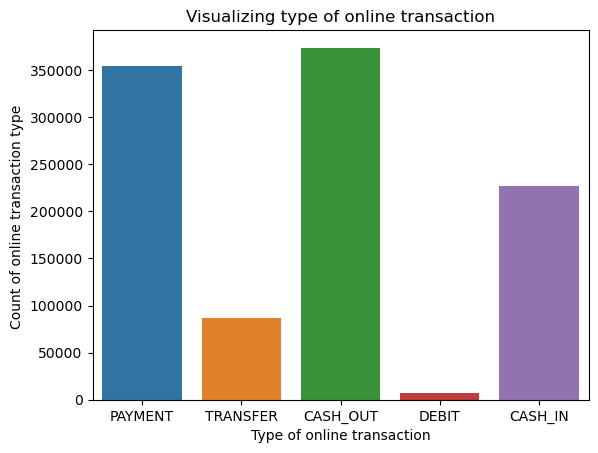

In [8]:
sns.countplot(x='type', data=data)
plt.title ("Visualizing type of online transaction")
plt.xlabel("Type of online transaction")
plt.ylabel("Count of online transaction type ")

<Axes: xlabel='type', ylabel='amount'>

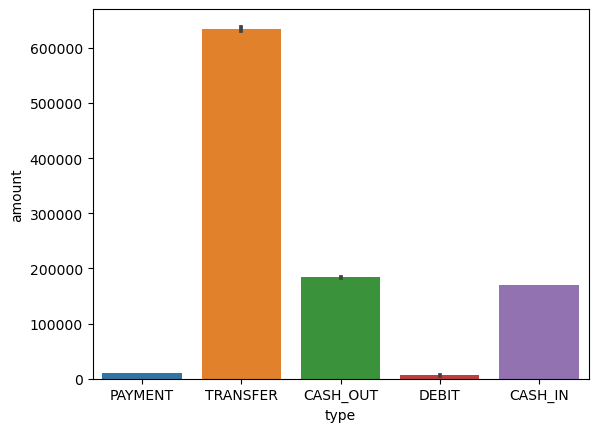

In [9]:
sns.barplot(x='type', y='amount', data=data)

In [10]:
data['isFraud'].value_counts()

isFraud
0    1047640
1       1144
Name: count, dtype: int64

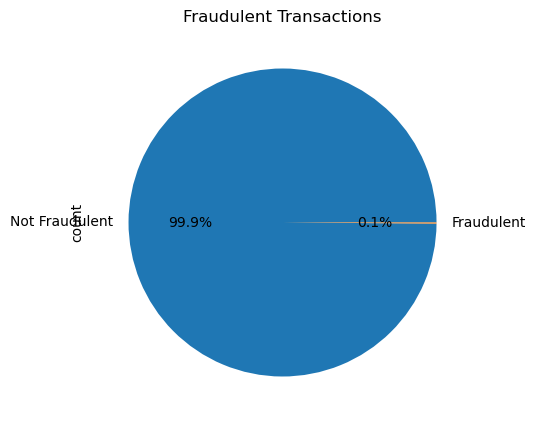

In [11]:
data['fraud_label'] = data['isFraud'].apply(lambda x: 'Fraudulent' if x == 1 else 'Not Fraudulent')

# Visualization
plt.figure(figsize=(10, 5))
plt.title("Fraudulent Transactions")
data['fraud_label'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
type_mapping = {
    'CASH_IN': 0,
    'CASH_OUT': 1,
    'PAYMENT': 2,
    'TRANSFER': 3,
    'DEBIT': 4  
}
data['type'] = data['type'].map(type_mapping)
print(data)

         step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1     2   9839.64  C1231006815       170136.0       160296.36   
1           1     2   1864.28  C1666544295        21249.0        19384.72   
2           1     3    181.00  C1305486145          181.0            0.00   
3           1     1    181.00   C840083671          181.0            0.00   
4           1     2  11668.14  C2048537720        41554.0        29885.86   
...       ...   ...       ...          ...            ...             ...   
1048779    95     2   7631.04   C296224330        31641.0        24009.96   
1048780    95     2   3675.41  C1250120735        12574.0         8898.59   
1048781    95     2  14528.80   C485568352       226039.0       211510.20   
1048782    95     2  12677.58   C546198335       211510.2       198832.61   
1048783    95     2   2264.72   C795327431        10909.0         8644.28   

            nameDest  oldbalanceDest  newbalanceDest  isFraud     fraud_lab

In [13]:
data.drop(columns=['step','fraud_label','nameOrig', 'nameDest'],inplace=True)

In [14]:
X = data.drop(['isFraud'], axis = 1)
Y = data.isFraud

In [15]:
X.shape, Y.shape

((1048784, 6), (1048784,))

<Axes: >

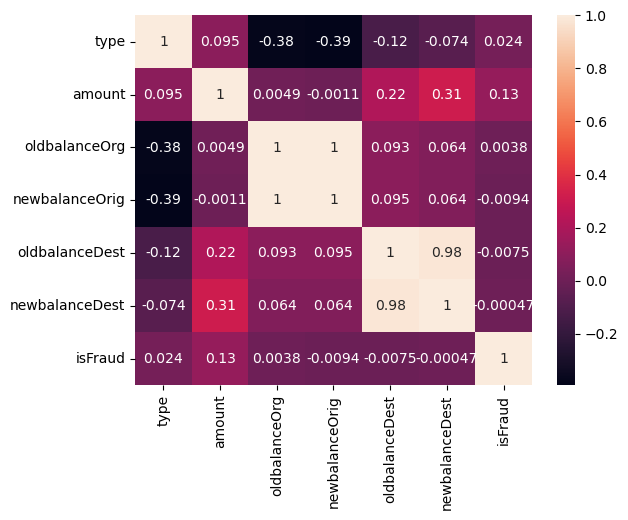

In [16]:
corel= data.corr()
sns.heatmap(corel, annot =True)

In [17]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [18]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score as ras
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
#Implementing Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [21]:
# Train XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

In [22]:
rf_acc = accuracy_score(y_test, rf_preds)
print("Random Forest Accuracy:", rf_acc)
print(classification_report(y_test, rf_preds))

Random Forest Accuracy: 0.9996376759774406
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209539
           1       0.96      0.68      0.80       218

    accuracy                           1.00    209757
   macro avg       0.98      0.84      0.90    209757
weighted avg       1.00      1.00      1.00    209757



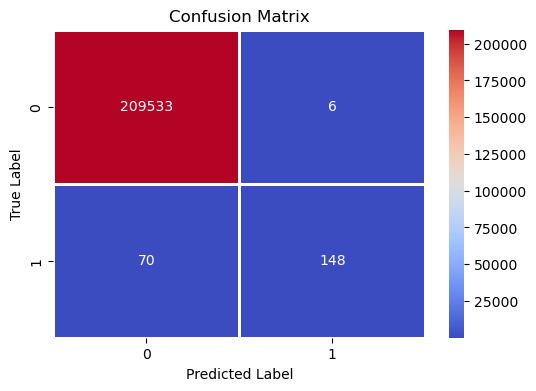

In [23]:
cm_ = confusion_matrix(y_test,rf_preds)
plt.figure(figsize = (6,4))
sns.heatmap(cm_, cmap ='coolwarm', linecolor = 'white', linewidths = 1, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [24]:
xgb_acc = accuracy_score(y_test, xgb_preds)
print("XGBoost Accuracy:", xgb_acc)
print(classification_report(y_test, xgb_preds))

XGBoost Accuracy: 0.9996376759774406
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209539
           1       0.94      0.70      0.80       218

    accuracy                           1.00    209757
   macro avg       0.97      0.85      0.90    209757
weighted avg       1.00      1.00      1.00    209757



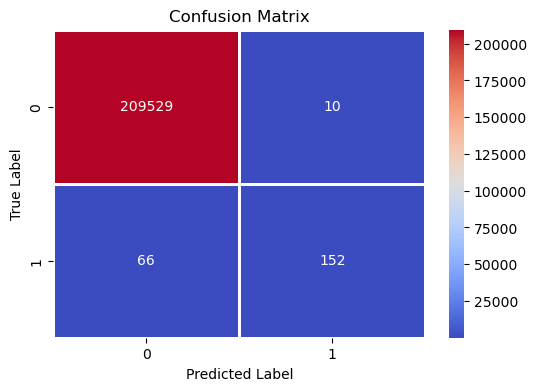

In [25]:
cm_ = confusion_matrix(y_test,xgb_preds)
plt.figure(figsize = (6,4))
sns.heatmap(cm_, cmap ='coolwarm', linecolor = 'white', linewidths = 1, annot = True, fmt = 'd')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [26]:
models = {'Random Forest': rf_model, 
          'XGBoost': xgb_model}
model_scores = {'Random Forest': rf_acc,
               'XGBoost': xgb_acc}
best_model_name = max(models, key=lambda name: model_scores[name])  # Based on scores
best_model = models[best_model_name]
print(f"Best model is {best_model_name}")

Best model is Random Forest


In [27]:
import joblib

# Save the best model
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [29]:
feature_name = ['type','amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
transaction_data = [[1,5000, 10000, 5000, 8000, 13000]]
new_data = pd.DataFrame(transaction_data, columns=feature_name)

# Prediction using the model
prediction = best_model.predict(new_data)

# Output the result
if prediction[0] == 1:
    print("This is a fraudulent transaction.")
else:
    print("This is not a fraudulent transaction.")

probabilities = best_model.predict_proba(new_data)
fraud_confidence = probabilities[0][1]# Probability of fraud (class 1)

HIGH_CONFIDENCE_THRESHOLD = 0.8
MEDIUM_CONFIDENCE_THRESHOLD = 0.5

# Recommendation logic
if fraud_confidence > HIGH_CONFIDENCE_THRESHOLD:
    recommendation = "Fraudulent transaction detected. Immediate alert required!"
elif MEDIUM_CONFIDENCE_THRESHOLD < fraud_confidence <= HIGH_CONFIDENCE_THRESHOLD:
    recommendation = "Suspicious transaction. Manual review recommended."
else:
    recommendation = "Transaction seems legitimate."
    
print(f"Fraud confidence: {fraud_confidence}")
print(recommendation)

This is not a fraudulent transaction.
Fraud confidence: 0.0006752463615010345
Transaction seems legitimate.
